# Coba Sendiri

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def transmisi_slab(Sig_t, tebal, N, isotropik=False):
    """Menghitung fraksi neutron yang lolos melalui slab
    
    Input :
    Sig_t :   tampang lintang makroskopik total
    tebal   :   tebal dari slab
    N       :   banyaknya neutron yang akan disimulasikan
    isotropik : apakah neutron isotropik atau berkas
    
    Return:
    transmisi : fraksi neutron yang berhasil lolos melalui slab
    """
    
    if (isotropik):
        mu = np.random.random(N)
    else:
        mu = 1
    
    theta = np.random.random(N)
    x = -np.log(1-theta)/Sig_t
    xproj = x*mu  # jarak terproyeksi
    transmisi = np.sum(xproj>tebal)/N #perbandingan keluar dan masuk
    
    
    if (N<=1e8):
        plt.figure()
        plt.scatter(xproj,np.arange(N))
        plt.xlabel("Jarak ke tumbukan (cm)")
        plt.ylabel("Neutron ke-")
        plt.title("Neutron yang disimulasikan ="+str(N)+"\n Fraksi yang lolos ="+str(transmisi))
        xc = tebal
        plt.axvline(x=xc,color='r',linestyle='dotted')
        plt.xlim(0.0, 4.0)
        
        
        plt.figure()
        plt.hist(x,200)
        plt.xlabel("Jarak ke tumbukan (cm)")
        plt.ylabel("Banyaknya neutron")
        plt.title("Histogram \n Neutron yang disimulasikan =" + str(N))
        plt.xlim(0.0, 6.0)
        plt.show()
        
        
        plt.figure()
        plt.hist(xproj,200)
        plt.xlabel("Jarak terproyeksi ke tumbukan (cm)")
        plt.ylabel("Banyaknya neutron")
        plt.title("Histogram \n Neutron yang disimulasikan =" + str(N))
        plt.xlim(0.0, 6.0)
        plt.show()
        
    return transmisi

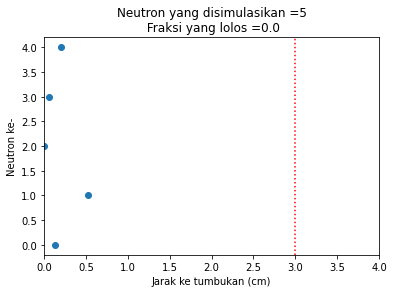

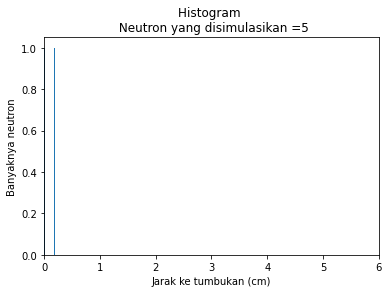

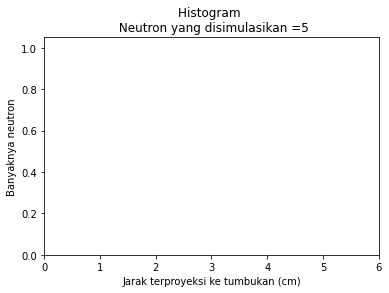

Dari 5 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


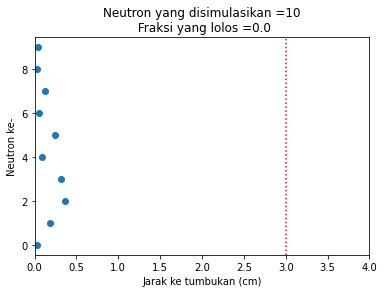

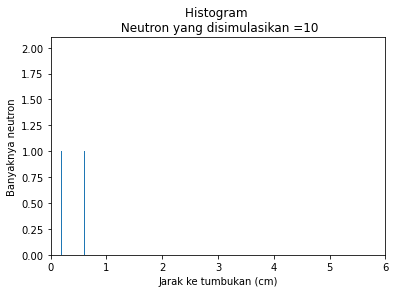

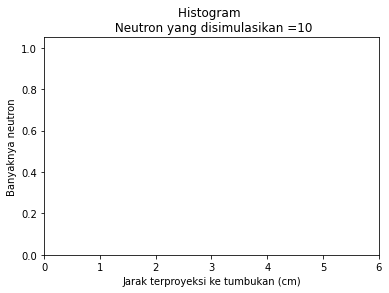

Dari 10 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


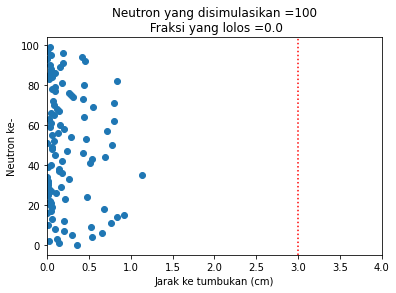

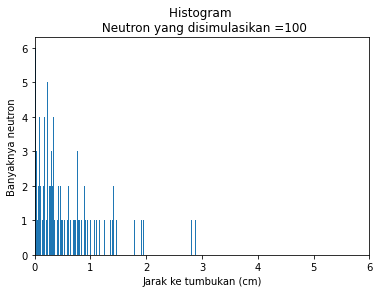

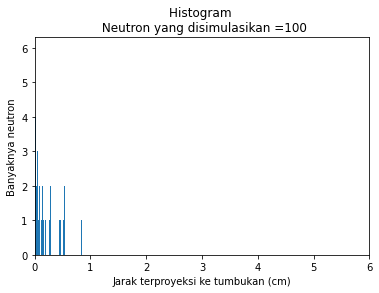

Dari 100 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


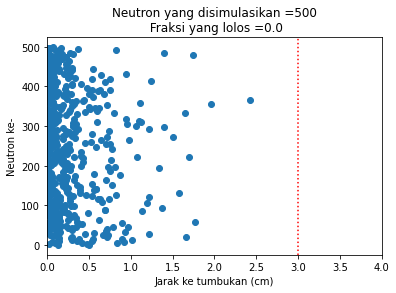

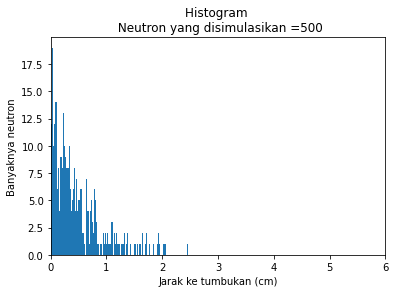

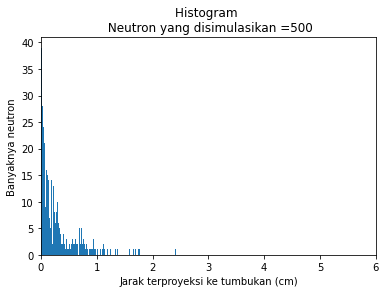

Dari 500 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


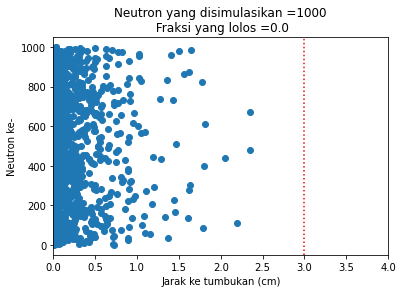

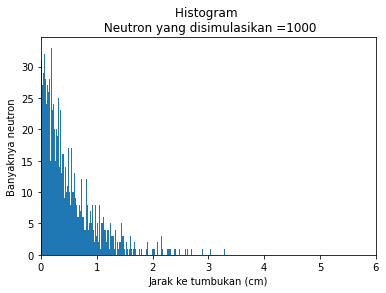

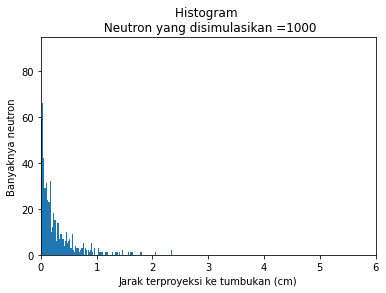

Dari 1000 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


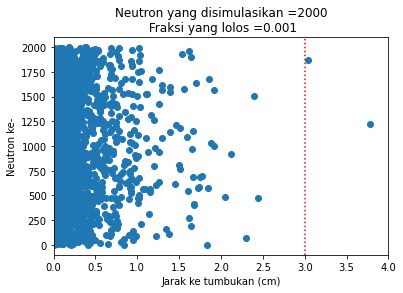

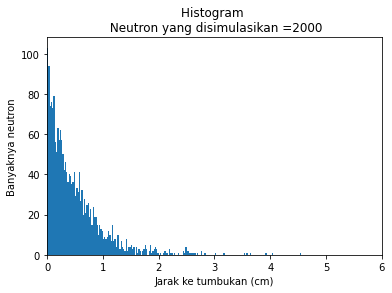

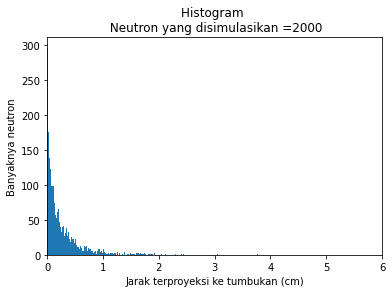

Dari 2000 neutron hanya 2 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.001 
 Galat = 214.21147060394588 %


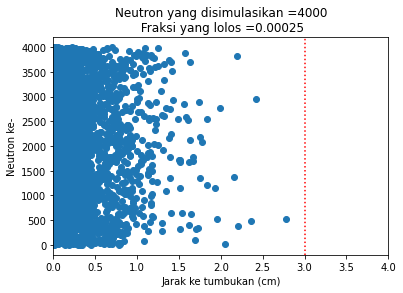

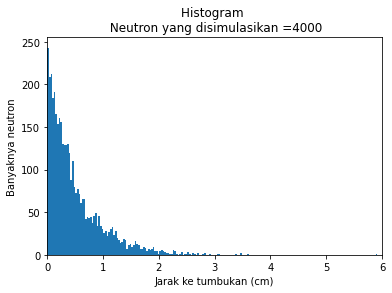

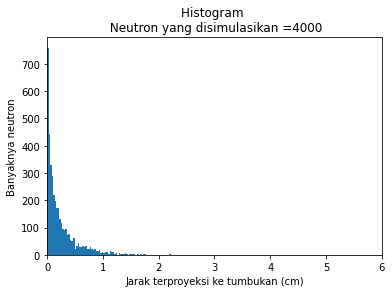

Dari 4000 neutron hanya 1 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00025 
 Galat = 21.447132349013533 %


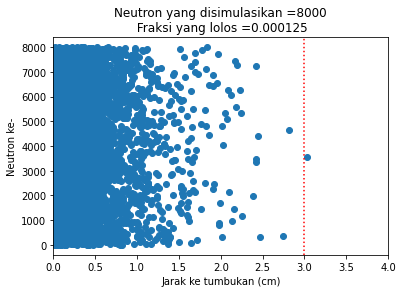

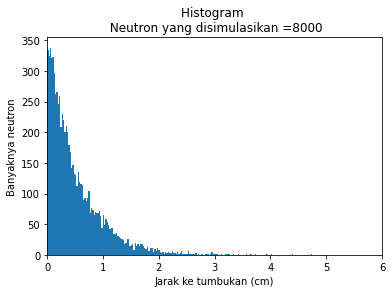

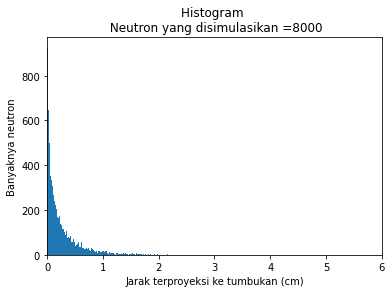

Dari 8000 neutron hanya 1 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.000125 
 Galat = 60.72356617450677 %


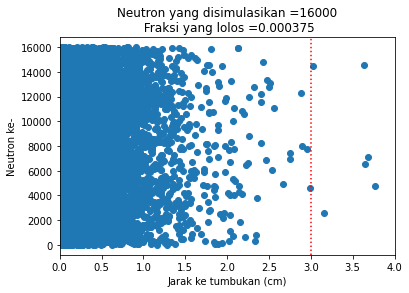

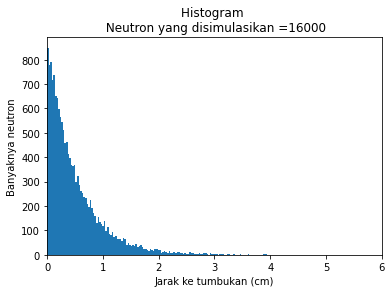

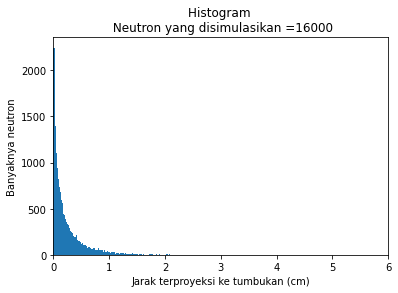

Dari 16000 neutron hanya 6 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.000375 
 Galat = 17.8293014764797 %


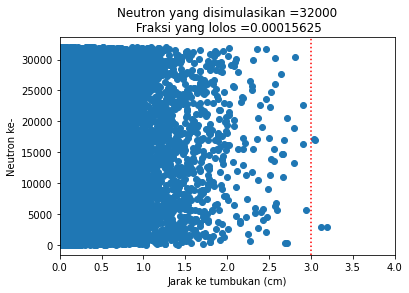

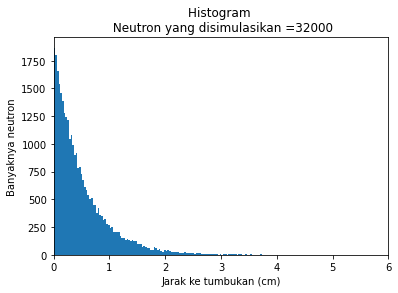

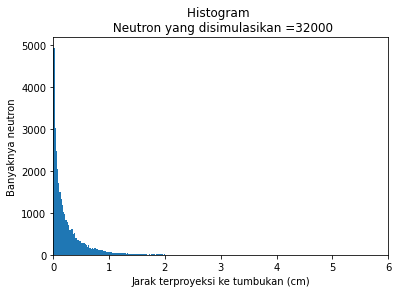

Dari 32000 neutron hanya 5 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00015625 
 Galat = 50.90445771813346 %


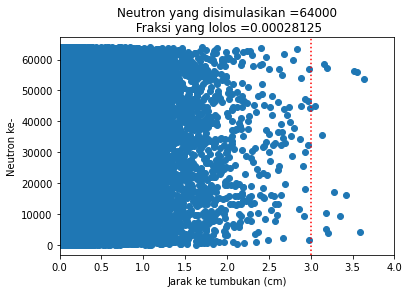

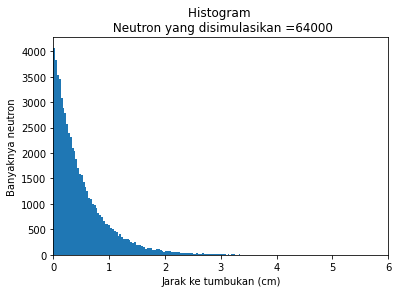

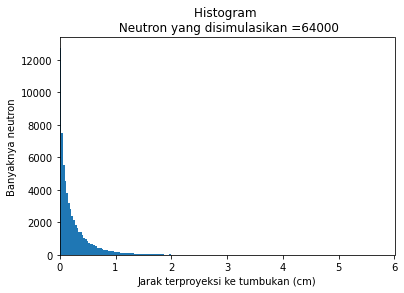

Dari 64000 neutron hanya 18 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00028125 
 Galat = 11.628023892640234 %


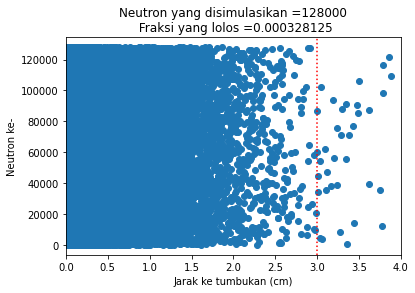

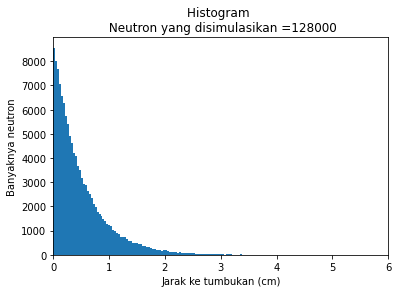

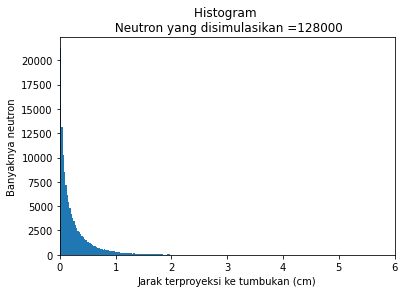

Dari 128000 neutron hanya 42 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.000328125 
 Galat = 3.10063879191974 %


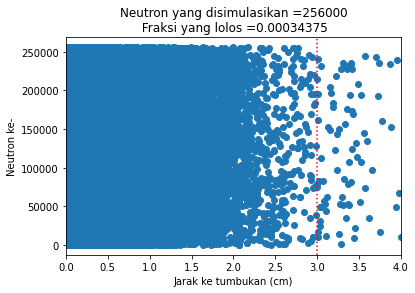

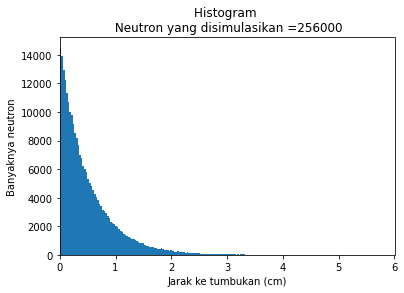

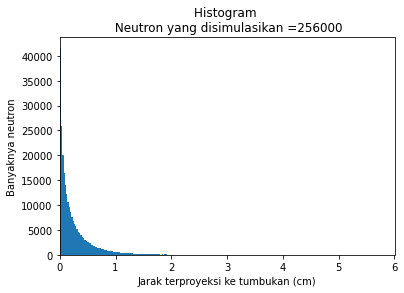

Dari 256000 neutron hanya 88 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00034375 
 Galat = 8.010193020106382 %


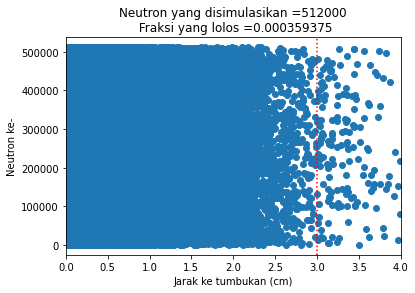

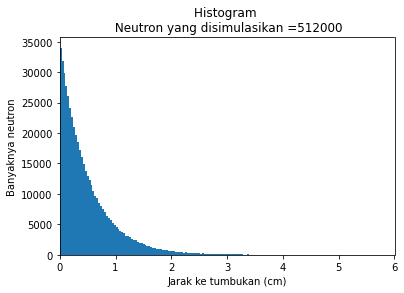

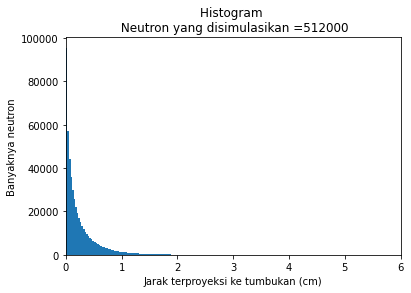

Dari 512000 neutron hanya 184 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.000359375 
 Galat = 12.91974724829304 %


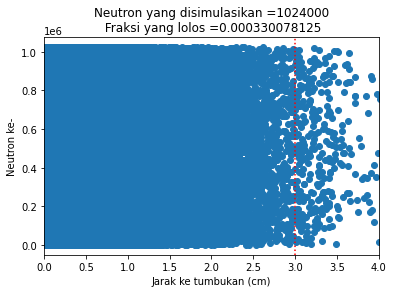

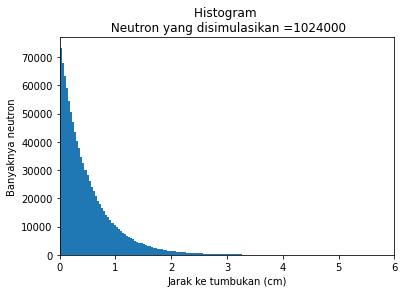

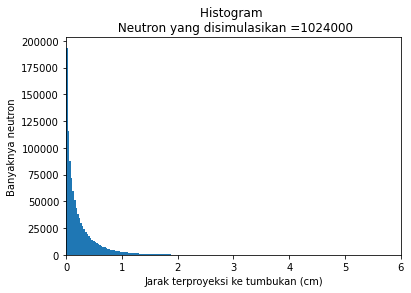

Dari 1024000 neutron hanya 338 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.000330078125 
 Galat = 3.7143330704430726 %


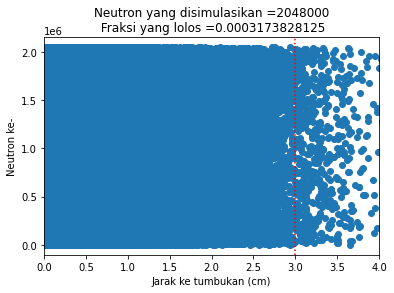

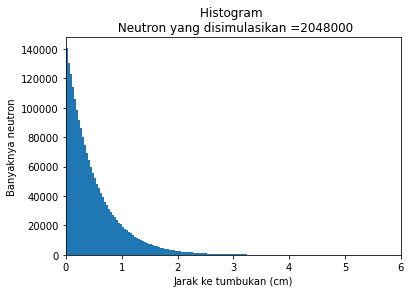

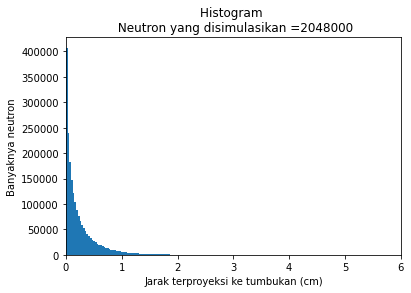

Dari 2048000 neutron hanya 650 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0003173828125 
 Galat = 0.27467973995858747 %


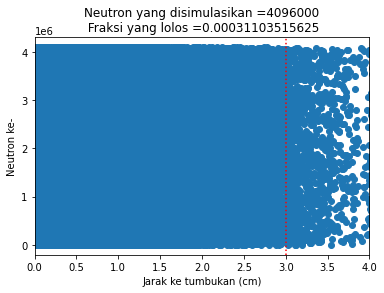

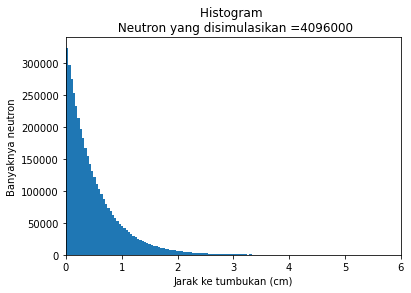

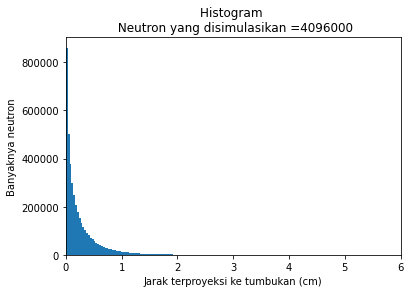

Dari 4096000 neutron hanya 1274 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00031103515625 
 Galat = 2.2691861451594173 %


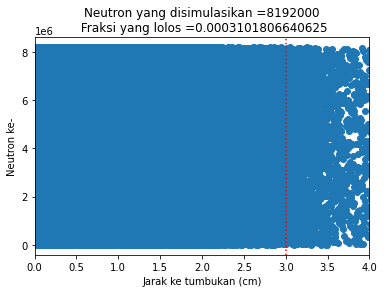

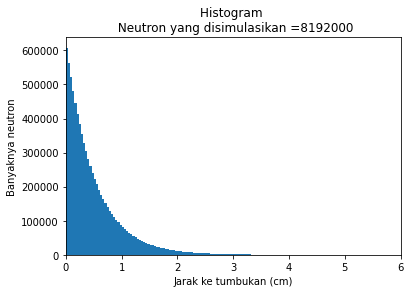

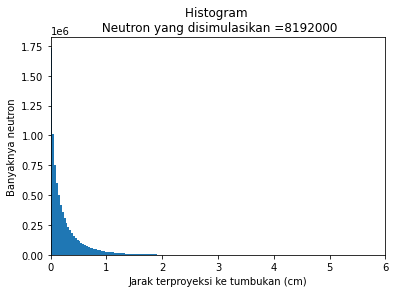

Dari 8192000 neutron hanya 2541 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0003101806640625 
 Galat = 2.5376773920133795 %


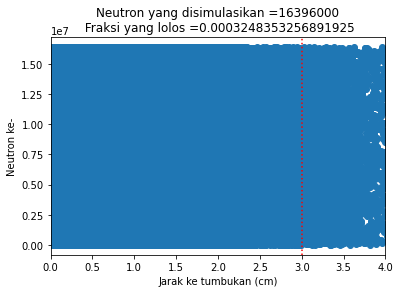

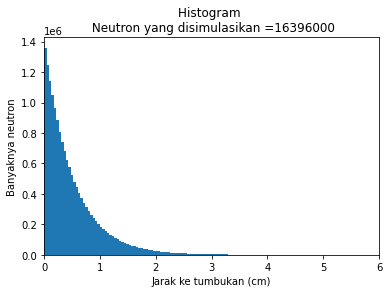

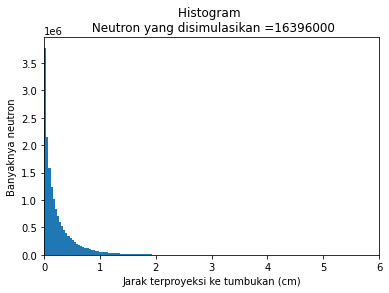

Dari 16396000 neutron hanya 5326 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0003248353256891925 
 Galat = 2.06698538891289 %


Text(0.5, 1.0, 'Nilai eksak = 0.000318257 ')

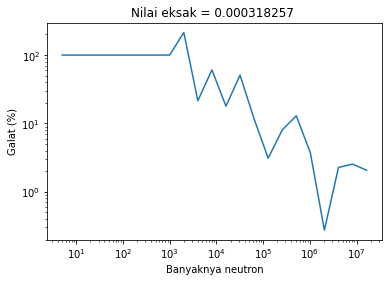

In [5]:
Sigma_t = 2.0
tebal = 3.0

neutron = np.array([5,10,100, 500, 1000,2000,4000,8000,16000,32000,
                    64000,128000,256e3, 512e3, 1024e3, 2048e3,
                    4096e3,8192e3,16396e3], dtype=int)

nilai_eksak = 0.000318257
# nilai eksak dihitung dari \int_0^1 \frac{d\mu}{\Sigma_t} e^{-\Sigma_t x/\mu} dx = E_2(\Sigma_t x) = E_2(6) 

galat = []

for N in neutron:
    lolos = transmisi_slab(Sigma_t, tebal, N, isotropik=True)
    galat.append(np.abs(lolos-nilai_eksak)/nilai_eksak*100)
    
    
    print("Dari",int(N),"neutron hanya",int(lolos*N),
          "berhasil lolos. \n Fraksi yang berhasil lolos sebesar",lolos,
         "\n Galat =",galat[-1],"%")

plt.figure()
plt.loglog(neutron,galat)
plt.xlabel("Banyaknya neutron")
plt.ylabel("Galat (%)")
plt.title("Nilai eksak = 0.000318257 ")
    

# Plek Ketiplek Pak Alex

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def transmisi_slab(Sig_t, tebal, N, isotropik=False):
    """Menghitung fraksi neutron yang lolos melalui slab
    
    Input :
    Sig_t :   tampang lintang makroskopik total
    tebal   :   tebal dari slab
    N       :   banyaknya neutron yang akan disimulasikan
    isotropik : apakah neutron isotropik atau berkas
    
    Return:
    transmisi : fraksi neutron yang berhasil lolos melalui slab
    """
    
    if (isotropik):
        mu = np.random.uniform(0,1,N)
    else:
        mu = 1
    
    theta = np.random.random(N)
    x = -np.log(1-theta)/Sig_t
    transmisi = np.sum(x>tebal/mu)/N #perbandingan keluar dan masuk
    xproj = x*mu  # jarak terproyeksi
    
    
    
    if (N<=1e8):
        plt.figure()
        plt.scatter(xproj,np.arange(N))
        plt.xlabel("Jarak ke tumbukan (cm)")
        plt.ylabel("Neutron ke-")
        plt.title("Neutron yang disimulasikan ="+str(N)+"\n Fraksi yang lolos ="+str(transmisi))
        xc = tebal
        plt.axvline(x=xc,color='r',linestyle='dotted')
        plt.xlim(0.0, 4.0)
        
        
        plt.figure()
        plt.hist(x,200)
        plt.xlabel("Jarak ke tumbukan (cm)")
        plt.ylabel("Banyaknya neutron")
        plt.title("Histogram \n Neutron yang disimulasikan =" + str(N))
        plt.xlim(0.0, 6.0)
        plt.show()
        
        
        plt.figure()
        plt.hist(xproj,200)
        plt.xlabel("Jarak terproyeksi ke tumbukan (cm)")
        plt.ylabel("Banyaknya neutron")
        plt.title("Histogram \n Neutron yang disimulasikan =" + str(N))
        plt.xlim(0.0, 6.0)
        plt.show()
        
    return transmisi

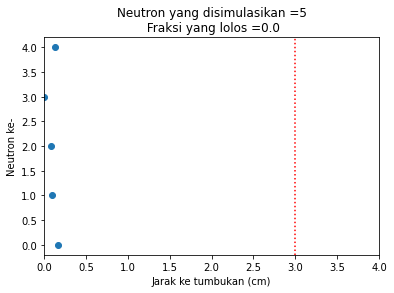

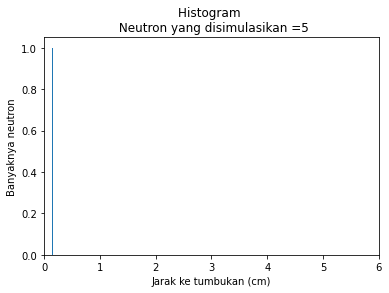

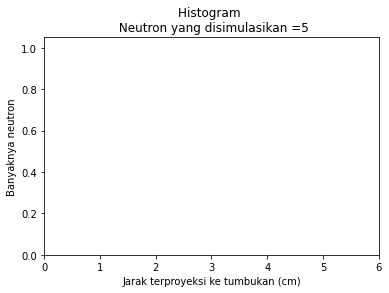

Dari 5 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


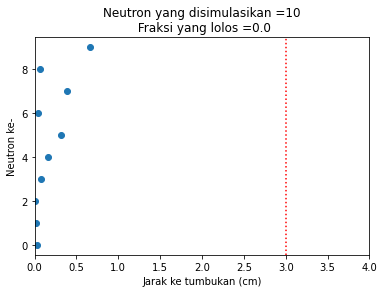

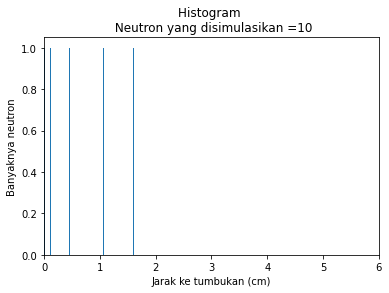

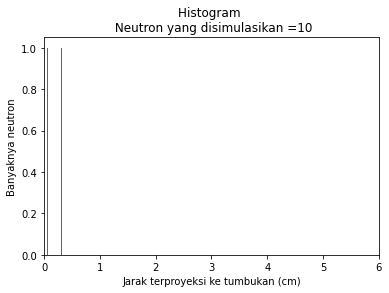

Dari 10 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


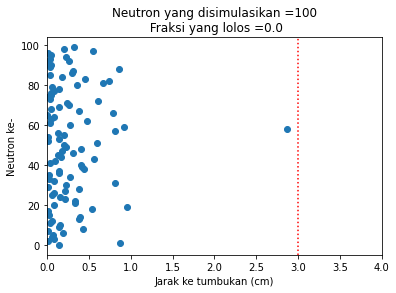

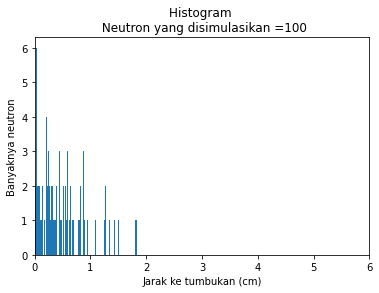

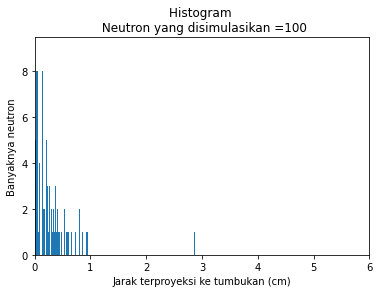

Dari 100 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


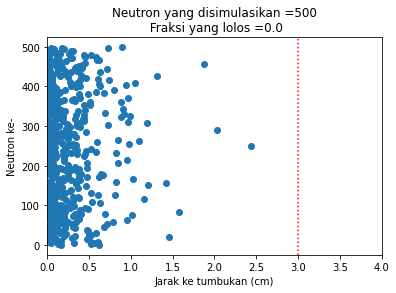

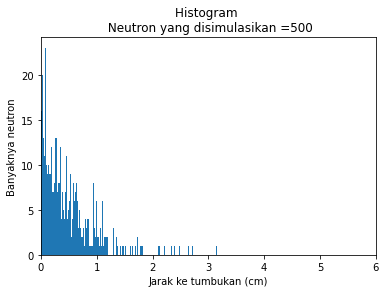

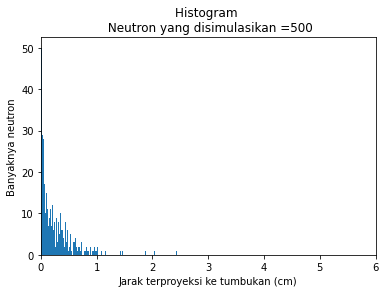

Dari 500 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


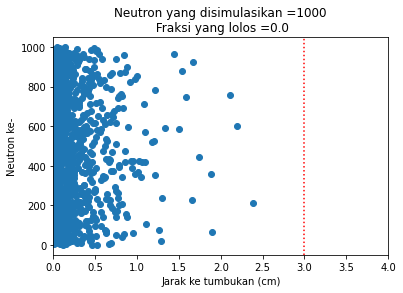

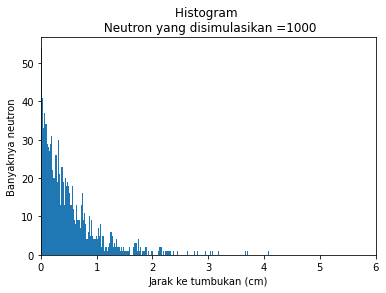

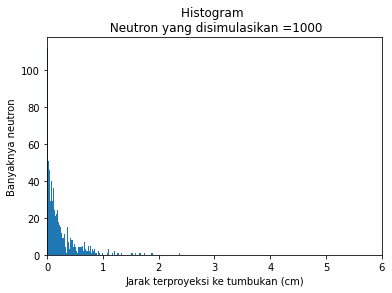

Dari 1000 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


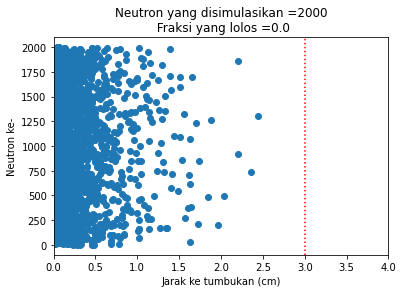

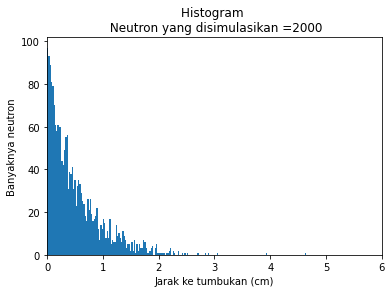

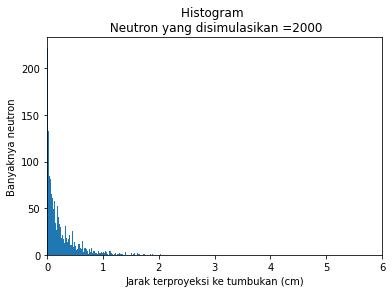

Dari 2000 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


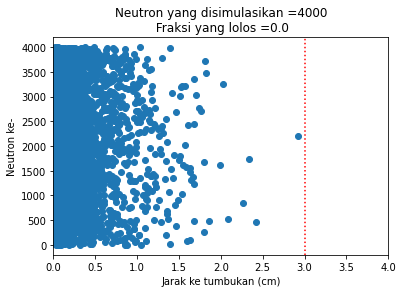

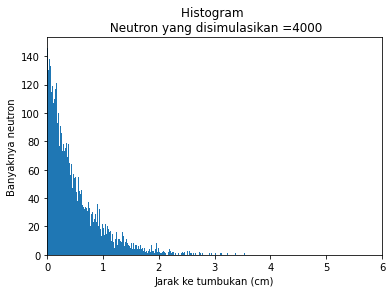

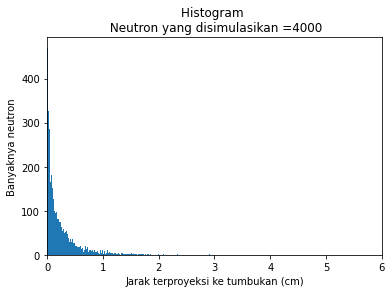

Dari 4000 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


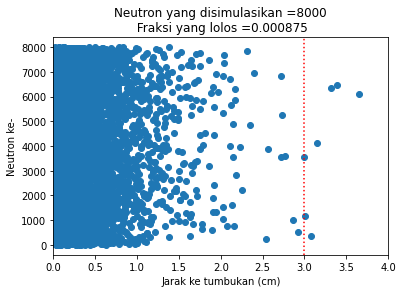

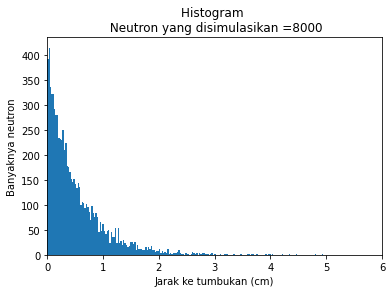

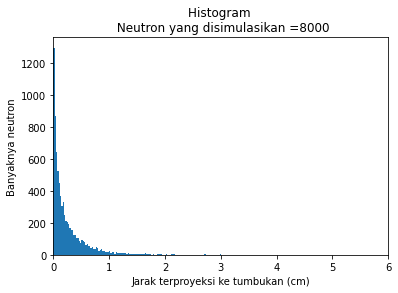

Dari 8000 neutron hanya 7 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.000875 
 Galat = 174.93503677845263 %


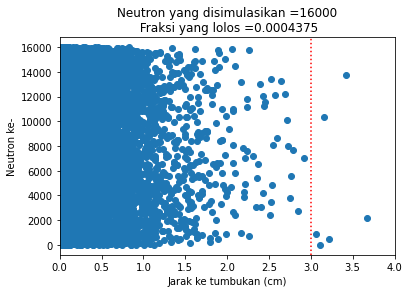

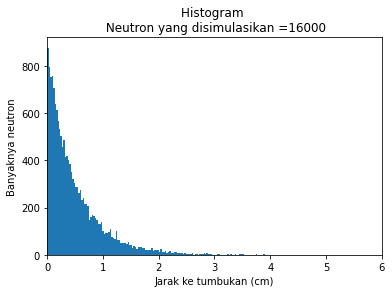

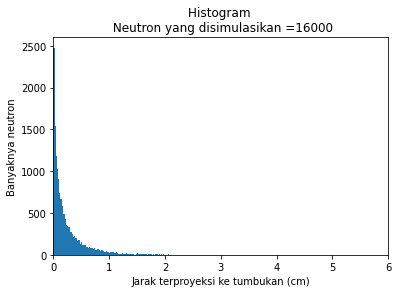

Dari 16000 neutron hanya 7 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0004375 
 Galat = 37.46751838922631 %


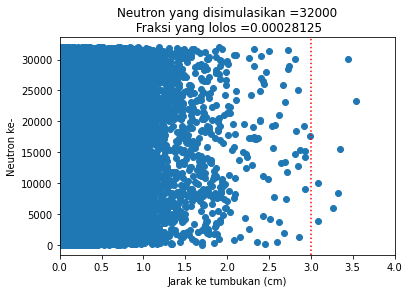

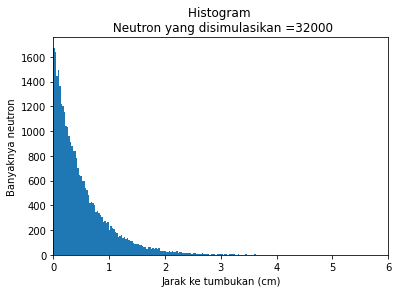

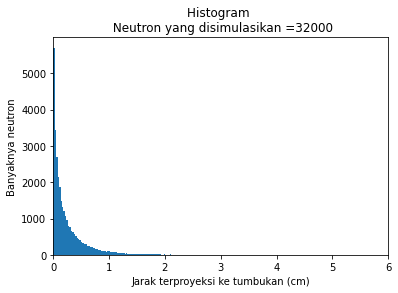

Dari 32000 neutron hanya 9 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00028125 
 Galat = 11.628023892640234 %


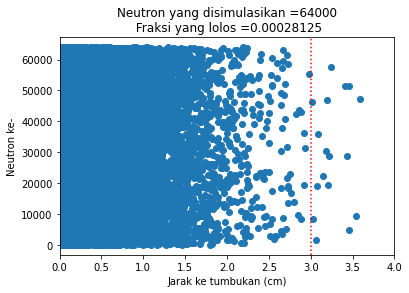

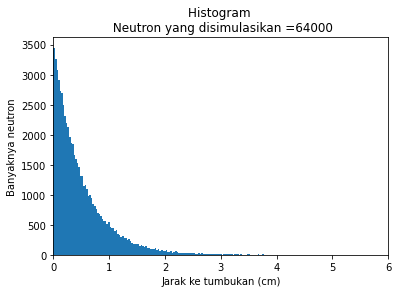

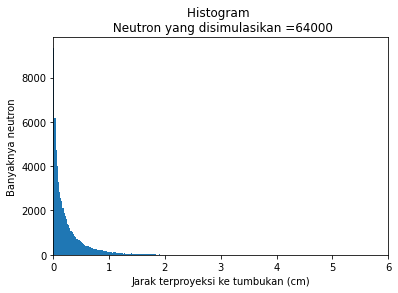

Dari 64000 neutron hanya 18 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00028125 
 Galat = 11.628023892640234 %


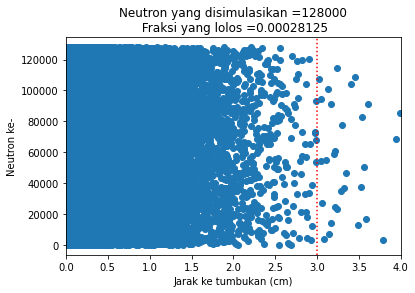

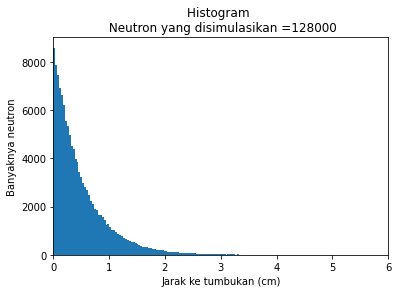

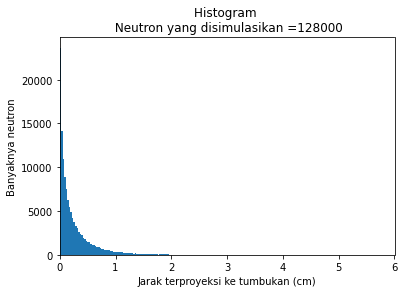

Dari 128000 neutron hanya 36 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00028125 
 Galat = 11.628023892640234 %


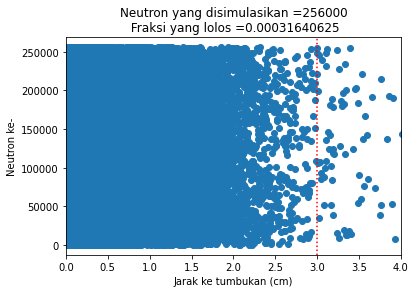

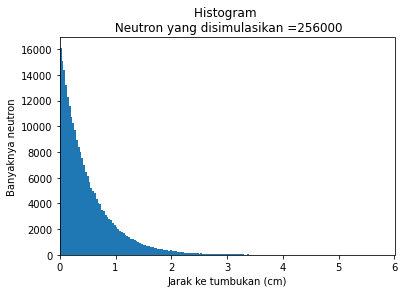

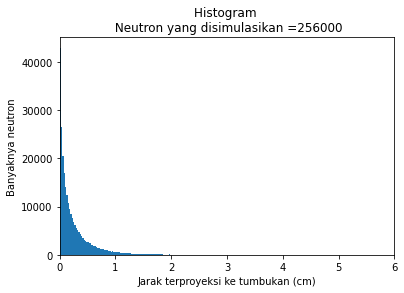

Dari 256000 neutron hanya 81 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00031640625 
 Galat = 0.5815268792202536 %


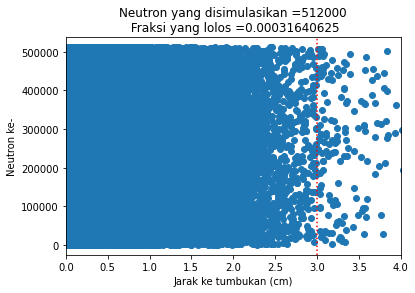

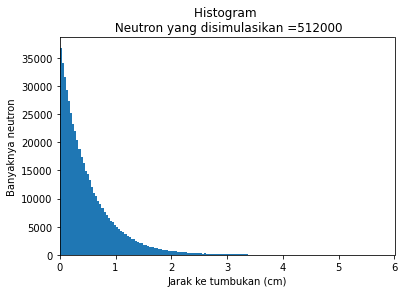

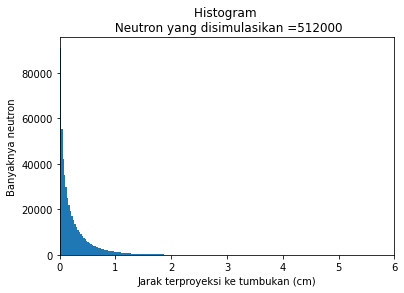

Dari 512000 neutron hanya 162 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00031640625 
 Galat = 0.5815268792202536 %


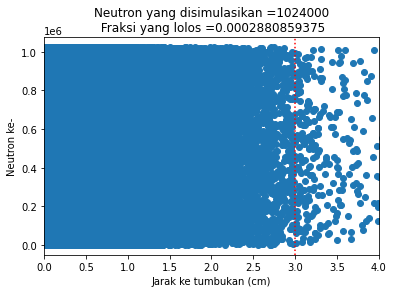

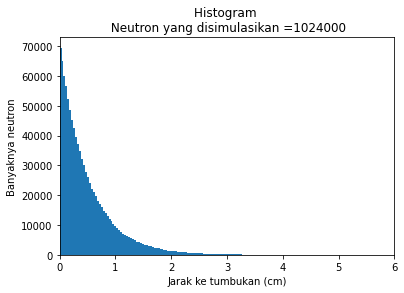

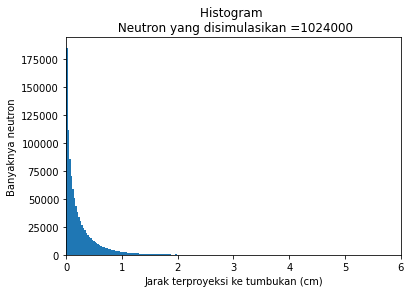

Dari 1024000 neutron hanya 295 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0002880859375 
 Galat = 9.48009391780857 %


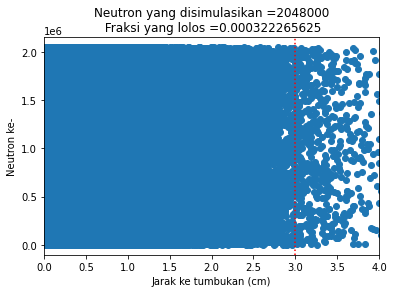

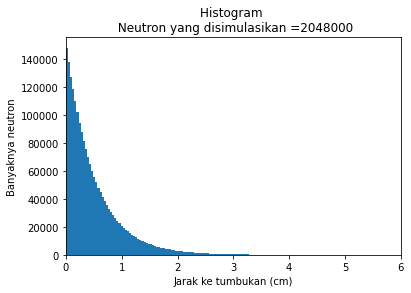

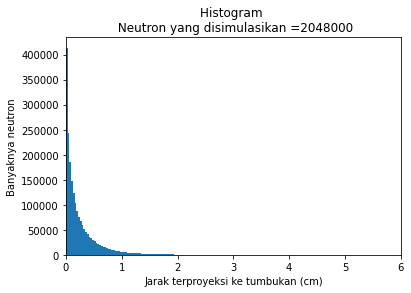

Dari 2048000 neutron hanya 660 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.000322265625 
 Galat = 1.2595559563497432 %


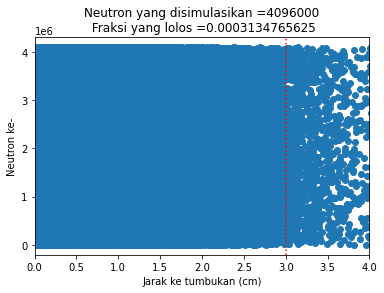

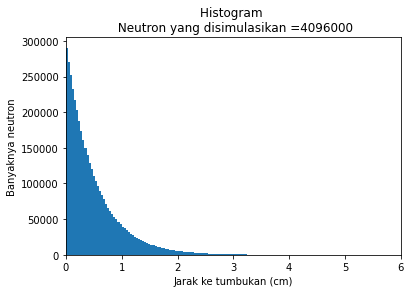

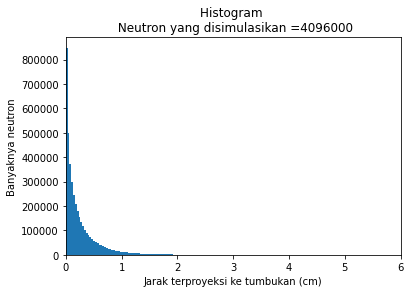

Dari 4096000 neutron hanya 1284 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0003134765625 
 Galat = 1.502068297005252 %


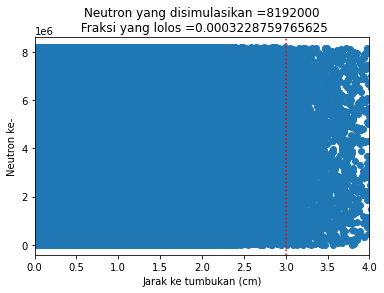

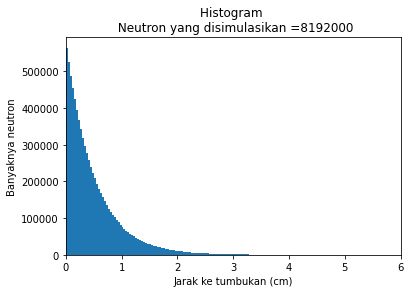

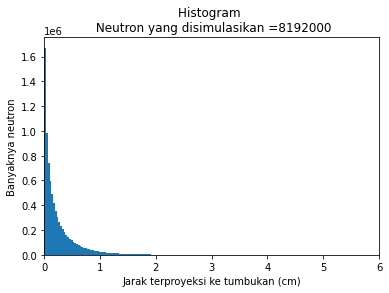

Dari 8192000 neutron hanya 2645 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0003228759765625 
 Galat = 1.4513354183882803 %


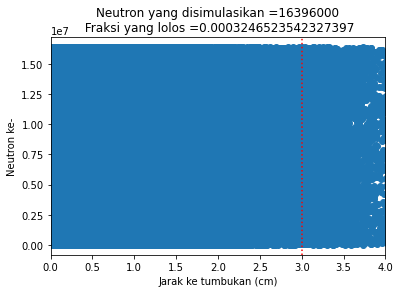

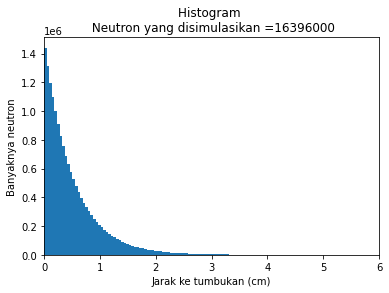

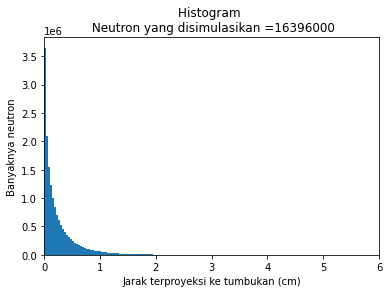

Dari 16396000 neutron hanya 5323 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0003246523542327397 
 Galat = 2.0094936585023047 %


Text(0.5, 1.0, 'Nilai eksak = 0.000318257 ')

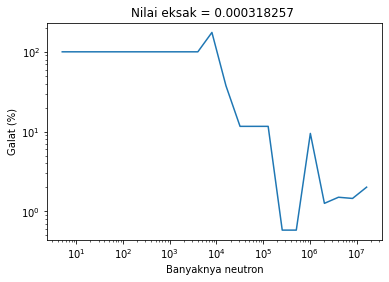

In [11]:
Sigma_t = 2.0
tebal = 3.0

neutron = np.array([5,10,100, 500, 1000,2000,4000,8000,16000,32000,
                    64000,128000,256e3, 512e3, 1024e3, 2048e3,
                    4096e3,8192e3,16396e3], dtype=int)

nilai_eksak = 0.000318257
# nilai eksak dihitung dari \int_0^1 \frac{d\mu}{\Sigma_t} e^{-\Sigma_t x/\mu} dx = E_2(\Sigma_t x) = E_2(6) 

galat = []

for N in neutron:
    lolos = transmisi_slab(Sigma_t, tebal, N, isotropik=True)
    galat.append(np.abs(lolos-nilai_eksak)/nilai_eksak*100)
    
    
    print("Dari",int(N),"neutron hanya",int(lolos*N),
          "berhasil lolos. \n Fraksi yang berhasil lolos sebesar",lolos,
         "\n Galat =",galat[-1],"%")

plt.figure()
plt.loglog(neutron,galat)
plt.xlabel("Banyaknya neutron")
plt.ylabel("Galat (%)")
plt.title("Nilai eksak = 0.000318257 ")
    

In [4]:
type(neutron[0])

numpy.float64